In [126]:
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)

## PMF coffee Shops

In [6]:
coffee_counts = defaultdict(int)

for index, item in df.iterrows():
    coffee_counts[item['cof_within_001']] += 1
 

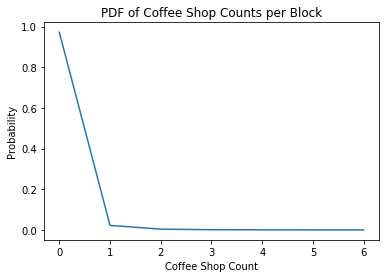

In [7]:
pmf_shops = defaultdict(int)
num_blocks = df.shape[0]
for key, value in coffee_counts.items():
    pmf_shops[key] = value/num_blocks
pmf_shops

fig = plt.figure()
ax  = plt.axes()
plt.title('PDF of Coffee Shop Counts per Block')
plt.xlabel('Coffee Shop Count')
plt.ylabel('Probability')
ax.plot(pmf_shops.keys(), pmf_shops.values())


## CDF Coffee Shops

In [8]:
cdf = {}
count = 0
num_blocks = df.shape[0]
for key, value in coffee_counts.items():
    cdf[key] = count/num_blocks
    count += value
cdf

{0: 0.0,
 1: 0.9722192218789829,
 2: 0.9944481648700612,
 3: 0.9982934047655052,
 4: 0.9994167332742866,
 5: 0.9998703851720637,
 6: 0.9999783975286772}

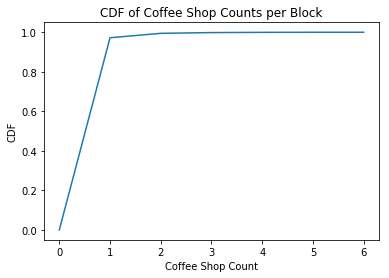

In [9]:
fig = plt.figure()
ax  = plt.axes()
plt.title('CDF of Coffee Shop Counts per Block')
plt.xlabel('Coffee Shop Count')
plt.ylabel('CDF')
ax.plot(cdf.keys(), cdf.values())

In [10]:
X_vals = np.linspace(0,6,14)
X_vals = X_vals.reshape(-1,1)
X = df['cof_within_001']

X = X.values.reshape(-1,1)

In [12]:
kde = KernelDensity(kernel='gaussian', bandwidth=.5).fit(X)
log_dens = kde.score_samples(X_vals)
kde.score()

TypeError: score() missing 1 required positional argument: 'X'

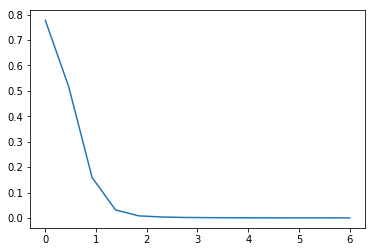

In [15]:
fig = plt.figure()
ax  = plt.axes()

ax.plot(X_vals, np.exp(log_dens))

In [16]:
from mpl_toolkits import mplot3d
%matplotlib inline



In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X_ax = np.linspace(df['block_lat'].min(), df['block_lat'].max(), num = 1000)
y_ax = np.linspace(df['block_lon'].min(), df['block_lon'].max(), num = 1000)

X = list(df['block_lat'])
Y = list(df['block_lon'])
Z = np.array(df['cof_within_001'])
Z = Z.reshape((len(X),len(Y)))
# X,Y = np.meshgrid(X,Y)
# ax.contour3D(X, Y, Z, 50, cmap='binary')

In [17]:
coffee_lat = df[['cof_within_001','block_lat', 'block_lon']]
coffee_lat = coffee_lat.sort_values('block_lat')
cof_within_100 = coffee_lat['cof_within_001'].values.reshape(-1,1)
X_vals = np.linspace(coffee_lat['block_lat'].min(), coffee_lat['block_lat'].max(), 46291)
X_vals = X_vals.reshape(-1,1)
X_vals
kde.fit(cof_within_100)
log_dens = kde.score_samples(X_vals)
log_dens
# plt.plot(X_vals, np.exp(log_dens))

array([-2552.05722045, -2552.05838574, -2552.05955104, ...,
       -2606.28267908, -2606.28385674, -2606.2850344 ])

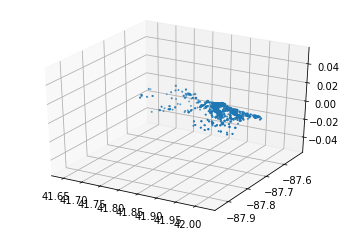

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x=coffee_lat['block_lat']
y=coffee_lat['block_lon']
z=coffee_lat['cof_within_001']
plt.scatter(x,y,z)

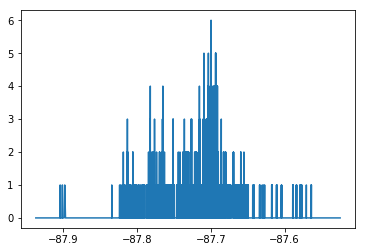

In [19]:
fig = plt.figure()
y=coffee_lat['block_lon'].sort_values(ascending=False)
z=coffee_lat['cof_within_001']
plt.plot(y,z)

In [22]:
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(z)

## Distribution counts

In [52]:
list(df)

['CENSUS BLOCK',
 'TOTAL POPULATION',
 'bus_within_001',
 'cof_within_001',
 'closest_el',
 'dist_to_closest_el',
 'daily_rides_closest_el',
 'best_shops_under_001',
 'block_lat',
 'block_lon',
 'crime_count',
 'dist_to_closest_library']

In [59]:
coffee_lat_count = defaultdict(int)
X_vals = np.linspace(coffee_lat['block_lat'].min(), coffee_lat['block_lat'].max(), 200)
bin_size = X_vals[1]-X_vals[0]
count = 0
for x in X_vals:
    for i, row in df.iterrows():
        if  x < row['block_lat'] <x+bin_size:
            lat_bin = (x+x+bin_size)/2
            coffee_lat_count[lat_bin] += row['cof_within_001']
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


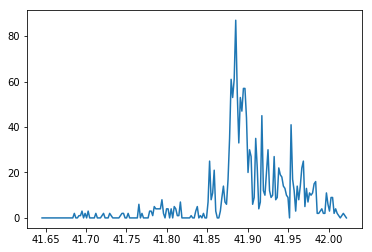

In [65]:
plt.plot(coffee_lat_count.keys(), coffee_lat_count.values())

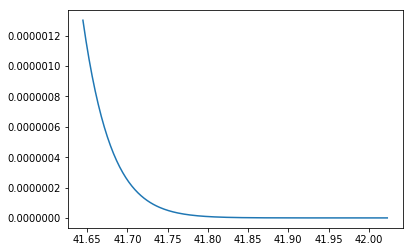

In [99]:
X = list(coffee_lat_count.values())
X = np.array(X).reshape(-1,1)
X.shape
kde = KernelDensity(kernel='gaussian', bandwidth=.15).fit(X)
log_dens = kde.score_samples(X_vals.reshape(-1,1))
plt.plot(X_vals, np.exp(log_dens))

## KDE with lats and longs

In [207]:
with open('../dataframes/df_with_libs.p', 'rb') as read_file:
    df = pickle.load(read_file)
X = df.drop(columns = ['CENSUS BLOCK', 'closest_el', 'daily_rides_closest_el', 'best_shops_under_001' ])

In [208]:
kde = KernelDensity()
kde.fit(X)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [227]:
X_samples = kde.score_samples(X)

In [228]:
sample_kde_2=X

In [229]:
sample_kde_2['kde_est'] = X_samples

In [230]:
sample_kde_2.to_csv('data/sample_kde_2.csv', index=False)

In [209]:
samp_kde = pd.DataFrame(kde.sample(1000), columns=X.columns)

In [210]:
samp_kde.block_lat.min()

38.45959256487583

In [219]:
samp_kde = pd.DataFrame(kde.sample(1000000), columns=X.columns)


In [220]:
max_lat = 41.997065
min_lon = -87.748249
min_lat = 41.662785
max_lon = -87.526167

samp_kde = samp_kde[samp_kde.block_lat.between(min_lat,max_lat)]
samp_kde = samp_kde[samp_kde.block_lon.between(min_lon, max_lon)]
len(samp_kde)

11680

In [223]:
samp_kde.to_csv('data/kde_sample1000000.csv')

In [ ]:
plt.bar( samp_kde.block_lat,samp_kde['cof_within_001'], width=.01)